In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("survey.csv")

df.head()



,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
print("Initial shape:", df.shape)

Initial shape: (1259, 27)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

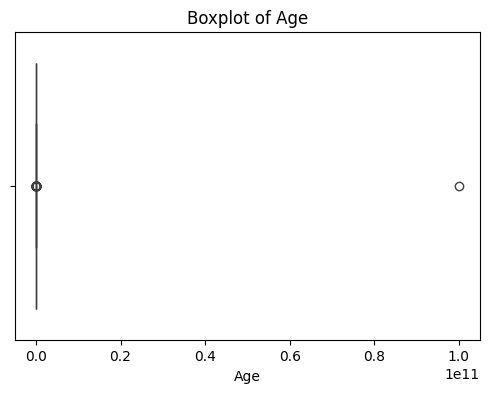

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()


In [5]:
# Check for extreme or invalid ages
print(df['Age'].describe())


count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64


In [6]:
df_copy = df.copy()


In [7]:
df_copy['state'] = df_copy['state'].fillna('Unknown')
df_copy['work_interfere'] = df_copy['work_interfere'].fillna('Unknown')
df_copy['self_employed'] = df_copy['self_employed'].fillna('Unknown')

In [8]:
print(df_copy.isnull().sum())


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [9]:
df_copy['Age'] = df_copy['Age'].fillna(df_copy['Age'].median())
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming df_copy has a column named 'Age'

bins = [-np.inf, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '>70']

df_copy['Age_bin'] = pd.cut(df_copy['Age'], bins=bins, labels=labels)

# Optional: check distribution
print(df_copy['Age_bin'].value_counts())

le = LabelEncoder()
df_copy['Age_bin_encoded'] = le.fit_transform(df_copy['Age_bin'])

df_copy = df_copy.drop(columns=['Age_bin'])



Age_bin
20-30    557
30-40    524
40-50    122
<20       28
50-60     22
60-70      3
>70        3
Name: count, dtype: int64


In [10]:
df_copy = df_copy.drop(columns=['comments'])
print(df_copy.isnull().sum())

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Age_bin_encoded              0
dtype: int64


In [11]:
print(df_copy.head())

             Timestamp  Age  Gender         Country    state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States       IL       Unknown   
1  2014-08-27 11:29:37   44       M   United States       IN       Unknown   
2  2014-08-27 11:29:44   32    Male          Canada  Unknown       Unknown   
3  2014-08-27 11:29:46   31    Male  United Kingdom  Unknown       Unknown   
4  2014-08-27 11:30:22   31    Male   United States       TX       Unknown   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No            

In [12]:
#cleaning and encoding gender values
df_copy["Gender"].replace(["M","male","Male","m","Man","Mal","Make","Cis Male","Male ","Male-ish",'maile',"Cis Man","Malr","cis male","Mail"], 0, inplace = True)
df_copy["Gender"].replace(["F","Female","female","f","Woman","woman","Female (trans)","Female ","Trans-female","Cis Female","Femake","femail","Trans woman"], 1, inplace = True)

for i in range(0,1259):
    if(df_copy.loc[i,"Gender"]!=0) and df_copy.loc[i,"Gender"]!=1:
        df_copy.loc[i,"Gender"] = "Unknown"

print(df_copy["Gender"].value_counts())


Gender
0          989
1          249
Unknown     21
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20960\4180212678.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Gender"].replace(["M","male","Male","m","Man","Mal","Make","Cis Male","Male ","Male-ish",'maile',"Cis Man","Malr","cis male","Mail"], 0, inplace = True)


In [13]:
#encoding diff columns

for col in df_copy.columns:
    if col =="Age" or col == "Country" or col == "Gender" or col == "state":
        continue
    df_copy[col].replace('No',0,inplace = True)
    df_copy[col].replace("Yes",1,inplace = True)
    df_copy[col].replace(["Maybe","Don't know","Some of them","Not sure"],'Unknown',inplace = True)
    print(df_copy[col].value_counts())
    
for col in df_copy.columns:
    if col == "Gender":
        for i in range(0,1259):
            if df_copy[col][i] !=0 and df_copy[col][i]!=1:
                df_copy[col][i] = "Unknown"

print(df_copy["Gender"].value_counts())



Timestamp
2014-08-27 12:43:28    2
2014-08-27 15:55:07    2
2014-08-27 12:54:11    2
2014-08-27 12:44:51    2
2014-08-27 12:37:50    2
                      ..
2015-02-21 11:48:52    1
2015-02-21 11:55:46    1
2015-02-21 13:19:11    1
2015-02-21 15:28:57    1
2014-08-27 11:34:00    1
Name: count, Length: 1246, dtype: int64
self_employed
0          1095
1           146
Unknown      18
Name: count, dtype: int64
family_history
0    767
1    492
Name: count, dtype: int64
treatment
1    637
0    622
Name: count, dtype: int64
work_interfere
Sometimes    465
Unknown      264
Never        213
Rarely       173
Often        144
Name: count, dtype: int64
no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64
remote_work
0    883
1    376
Name: count, dtype: int64
tech_company
1    1031
0     228
Name: count, dtype: int64
benefits
1          477
Unknown    408
0          374
Name: co

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20960\3220474827.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].replace('No',0,inplace = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20960\3220474827.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [14]:
from sklearn.preprocessing import LabelEncoder

def safe_label_encode(series):
    le = LabelEncoder()
    mask = series != "Unknown"
    le.fit(series[mask])
    series_encoded = series.copy()
    series_encoded[mask] = le.transform(series[mask])
    return series_encoded



from sklearn.preprocessing import LabelEncoder

#label encoding "work_interfere" column

df_copy["work_interfere"] = safe_label_encode(df_copy["work_interfere"])
print(df_copy["work_interfere"].value_counts())

#label encoding "leave" column

df_copy["leave"] = safe_label_encode(df_copy["leave"])
print(df_copy["leave"].value_counts())

#label encoding "no_employees" column

df_copy["no_employees"] = safe_label_encode(df_copy["no_employees"])

print(df_copy["no_employees"].value_counts())

work_interfere
3          465
Unknown    264
0          213
2          173
1          144
Name: count, dtype: int64
leave
Unknown    563
1          266
3          206
0          126
2           98
Name: count, dtype: int64
no_employees
4    290
2    289
5    282
1    176
0    162
3     60
Name: count, dtype: int64


In [15]:
#dropping unecessary columns

df_copy.reset_index(drop=True, inplace=True)
df_copy.drop(columns=['Timestamp'], inplace=True)
print(df_copy.head())

df_copy.to_excel("survey_modified.xlsx",index=False)

print(df_copy["Gender"].value_counts())

   Age Gender         Country    state self_employed  family_history  \
0   37      1   United States       IL       Unknown               0   
1   44      0   United States       IN       Unknown               0   
2   32      0          Canada  Unknown       Unknown               0   
3   31      0  United Kingdom  Unknown       Unknown               1   
4   31      0   United States       TX       Unknown               0   

   treatment work_interfere no_employees  remote_work  ...    leave  \
0          1              1            4            0  ...        1   
1          0              2            5            0  ...  Unknown   
2          0              2            4            0  ...        0   
3          1              1            2            0  ...        0   
4          0              0            1            1  ...  Unknown   

  mental_health_consequence phys_health_consequence coworkers supervisor  \
0                         0                       0   Unknown   

In [16]:
#And filling unknown values since data is MCAR

from sklearn.experimental import enable_iterative_imputer  # needed to enable it
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import pandas as pd


# Replace 'Unknown' with NaN
df_copy = df_copy.replace('Unknown', np.nan)
print(df_copy.head())


np.random.seed(42) # Adding seed to generate same randomness everytime
for col in df_copy.columns:
    if col=="Country" or col=="state":
        print(col)
        continue
    
    else :
        df_copy[col] = df_copy[col].apply(
        lambda x: np.random.choice(df_copy.loc[df_copy[col].notna(), col])
        if pd.isna(x) else x )







C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20960\185374413.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy = df_copy.replace('Unknown', np.nan)


   Age  Gender         Country state  self_employed  family_history  \
0   37     1.0   United States    IL            NaN               0   
1   44     0.0   United States    IN            NaN               0   
2   32     0.0          Canada   NaN            NaN               0   
3   31     0.0  United Kingdom   NaN            NaN               1   
4   31     0.0   United States    TX            NaN               0   

   treatment  work_interfere no_employees  remote_work  ...  leave  \
0          1             1.0            4            0  ...    1.0   
1          0             2.0            5            0  ...    NaN   
2          0             2.0            4            0  ...    0.0   
3          1             1.0            2            0  ...    0.0   
4          0             0.0            1            1  ...    NaN   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                        0.0                      0.0        NaN        

In [17]:
#  Quick inspection
pd.set_option('display.max_columns', 200)
print("Columns:", list(df_copy.columns))
print("\nData types:")
print(df_copy.dtypes.value_counts())


Columns: ['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'Age_bin_encoded']

Data types:
float64    16
int64       8
object      2
Name: count, dtype: int64


In [18]:
# Cell 4: Inspect Country and state missingness
for c in ['Country','state']:
    if c in df_copy.columns:
        print(f"\nColumn '{c}':")
        print("  Missing:", df_copy[c].isna().sum(), " / ", len(df))
        print("  Unique non-null count:", df_copy[c].nunique())
        print("  Sample values:", df_copy[c].dropna().unique()[:10])
    else:
        print(f"\nColumn '{c}' not present.")


Column 'Country':
  Missing: 0  /  1259
  Unique non-null count: 48
  Sample values: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia']

Column 'state':
  Missing: 515  /  1259
  Unique non-null count: 45
  Sample values: ['IL' 'IN' 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY']


In [19]:
df_copy.drop('state', axis=1, inplace=True)

In [20]:
# Step 1: Find top 9 most frequent countries
top_9 = df_copy['Country'].value_counts().nlargest(9).index

# Step 2: Replace all others with "Other"
df_copy['Country_grouped'] = df_copy['Country'].apply(lambda x: x if x in top_9 else 'Other')

# Step 3 (optional): Label Encode the 10 categories
le = LabelEncoder()
df_copy['Country_encoded'] = le.fit_transform(df_copy['Country_grouped'])

# Display result
print(df_copy[['Country', 'Country_grouped', 'Country_encoded']])




#Dropping columns

df_copy.drop('Country', axis=1, inplace=True)
df_copy.drop('Country_grouped', axis=1, inplace=True)



             Country Country_grouped  Country_encoded
0      United States   United States                9
1      United States   United States                9
2             Canada          Canada                1
3     United Kingdom  United Kingdom                8
4      United States   United States                9
...              ...             ...              ...
1254  United Kingdom  United Kingdom                8
1255   United States   United States                9
1256   United States   United States                9
1257   United States   United States                9
1258   United States   United States                9

[1259 rows x 3 columns]


Train shape: (1007, 24)
Test shape: (252, 24)
Running GridSearchCV...
Fitting 5 folds for each of 192 candidates, totalling 960 fits

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.7377863159450273

Test Accuracy: 0.6626984126984127

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.74       156
         1.0       0.56      0.50      0.53        96

    accuracy                           0.66       252
   macro avg       0.64      0.63      0.63       252
weighted avg       0.66      0.66      0.66       252



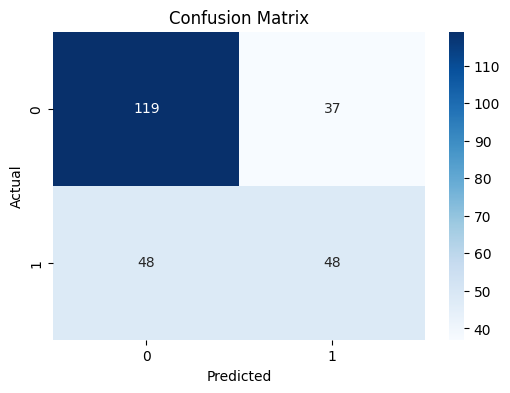

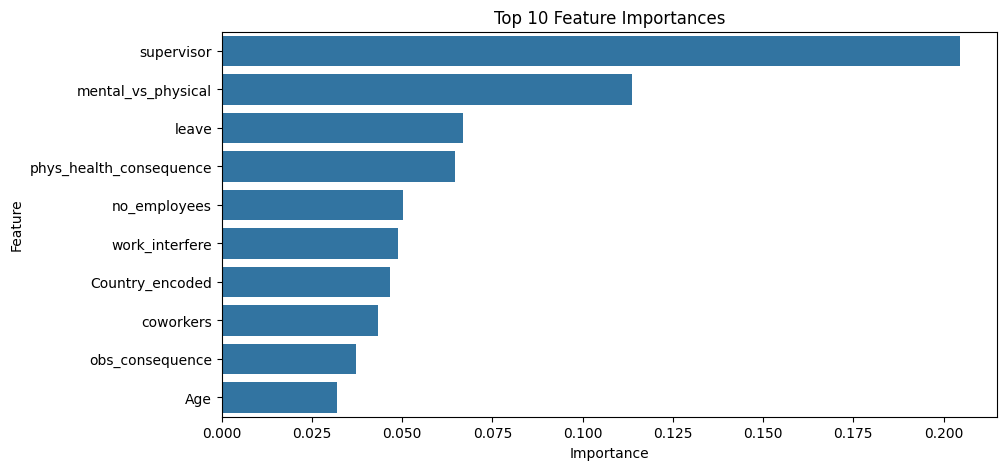

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# --- Define target and features ---
target_col = 'mental_health_consequence'
feature_cols = [col for col in df_copy.columns if col != target_col]

X = df_copy[feature_cols]
y = df_copy[target_col]

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Scale numeric features ---
numeric_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


# Random Forest with parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

print("Running GridSearchCV...")
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Training XGBoost model...


d:\Music\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:21:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 XGBoost Accuracy: 0.6270

Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.69      0.70       156
         1.0       0.51      0.52      0.52        96

    accuracy                           0.63       252
   macro avg       0.61      0.61      0.61       252
weighted avg       0.63      0.63      0.63       252



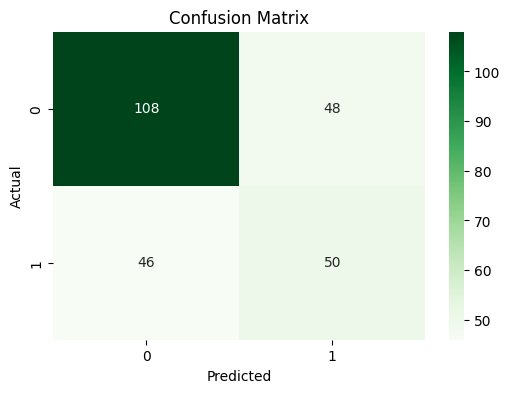

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20960\2278860325.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(10), y=importances.head(10).index, palette='viridis')


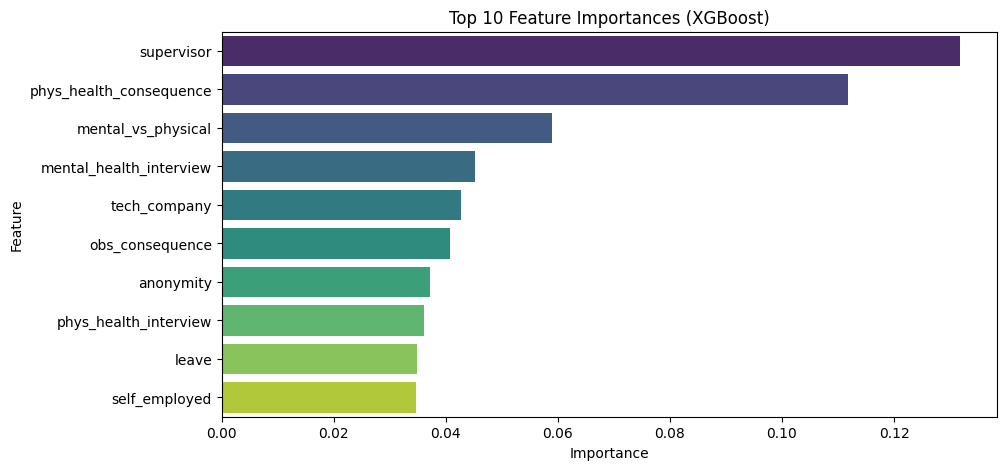

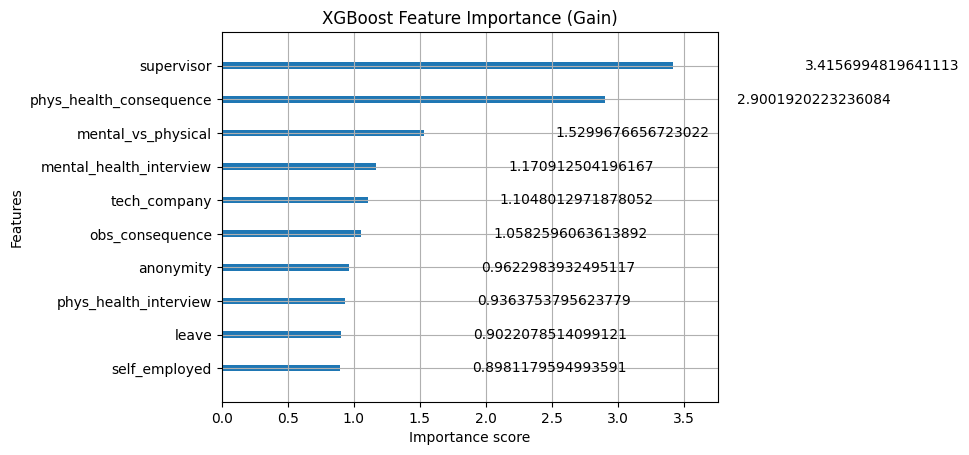

In [22]:



import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Train XGBoost Model ---
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

print("Training XGBoost model...")
xgb.fit(X_train, y_train)

# --- Predictions ---
y_pred = xgb.predict(X_test)

# --- Metrics ---
acc = accuracy_score(y_test, y_pred)
print(f"\n XGBoost Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- Feature Importance (Top 10) ---
importances = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette='viridis')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# --- Optional: Built-in XGBoost Plot ---
plot_importance(xgb, max_num_features=10, importance_type='gain', title='XGBoost Feature Importance (Gain)')
plt.show()


Calculating feature importances using XGBoost...


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30780\4020008045.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(15), y=importances.head(15).index, palette='mako')


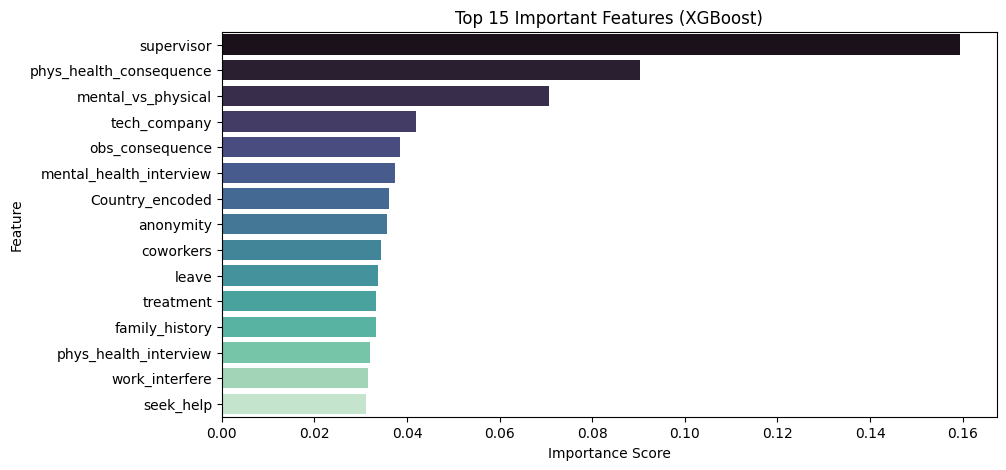

✅ Using top 5 important features for training...

Training stacking ensemble on selected features...

✅ Ensemble Accuracy: 68.25 %

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       156
         1.0       0.59      0.56      0.57        96

    accuracy                           0.68       252
   macro avg       0.66      0.66      0.66       252
weighted avg       0.68      0.68      0.68       252



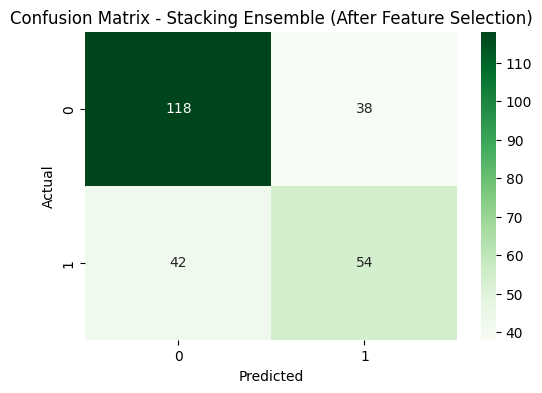


Evaluating accuracy vs number of top features (using 5-fold CV)...
Top 5 features -> Accuracy: 0.7398
Top 10 features -> Accuracy: 0.7090
Top 15 features -> Accuracy: 0.7229
Top 20 features -> Accuracy: 0.7269
Top 30 features -> Accuracy: 0.7249
Top 40 features -> Accuracy: 0.7249


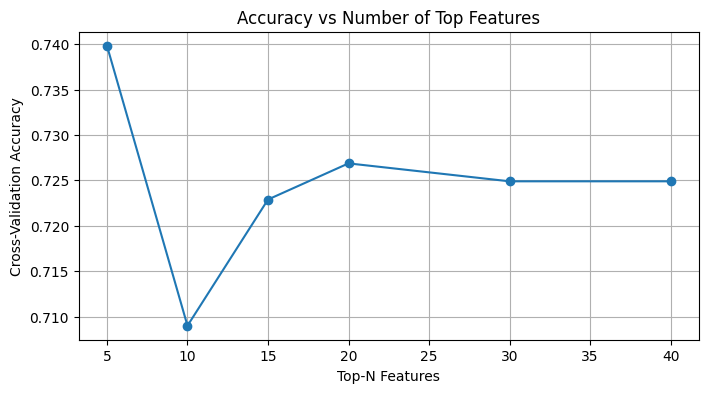

In [25]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# -------------------- BASE MODELS -------------------- #
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

meta_model = LogisticRegression(max_iter=500)

stack_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model)],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# -------------------- FEATURE SELECTION -------------------- #
print("Calculating feature importances using XGBoost...")

xgb_model.fit(X_train, y_train)
importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,5))
sns.barplot(x=importances.head(15), y=importances.head(15).index, palette='mako')
plt.title("Top 15 Important Features (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Select top N important features 
TOP_N = 5
selected_features = importances.head(TOP_N).index.tolist()

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

print(f"✅ Using top {TOP_N} important features for training...")

# -------------------- TRAIN STACKING MODEL -------------------- #
print("\nTraining stacking ensemble on selected features...")
stack_model.fit(X_train_sel, y_train)

# Predict and evaluate
y_pred = stack_model.predict(X_test_sel)

print("\n✅ Ensemble Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Stacking Ensemble (After Feature Selection)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------- OPTIONAL: EVALUATE DIFFERENT TOP-N FEATURES -------------------- #
print("\nEvaluating accuracy vs number of top features (using 5-fold CV)...")

feature_counts = [5, 10, 15, 20, 30, 40]
scores = []

for n in feature_counts:
    top_feats = importances.head(n).index
    X_train_temp = X_train[top_feats]
    cv_score = cross_val_score(stack_model, X_train_temp, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    scores.append(cv_score)
    print(f"Top {n} features -> Accuracy: {cv_score:.4f}")

plt.figure(figsize=(8,4))
plt.plot(feature_counts, scores, marker='o')
plt.title("Accuracy vs Number of Top Features")
plt.xlabel("Top-N Features")
plt.ylabel("Cross-Validation Accuracy")
plt.grid(True)
plt.show()


In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# --- Select top correlated features ---
corr = df_copy.corr(numeric_only=True)['mental_health_consequence'].abs().sort_values(ascending=False)
top_features = corr.index[1:9]

X = df_copy[top_features]
y = df_copy['mental_health_consequence']

# --- Scale and fit logistic regression ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LogisticRegression(max_iter=500)
model.fit(X_scaled, y)

# --- Compute absolute normalized weights and risk index ---
weights = pd.Series(model.coef_[0], index=top_features)
weights = weights.abs() / weights.abs().sum()

raw_risk = np.dot(X_scaled, weights)
df_copy['risk_index'] = 10 * (raw_risk - raw_risk.min()) / (raw_risk.max() - raw_risk.min())

# --- Define risk ranges ---
bins = [0, 2, 4, 6, 8, 10]
labels = ['Very Low Risk', 'Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk']
df_copy['risk_level'] = pd.cut(df_copy['risk_index'], bins=bins, labels=labels, include_lowest=True)

# --- Display grading description ---
for i, label in enumerate(labels):
    print(f"{bins[i]}-{bins[i+1]} : {label}")
    # show 3 sample rows from this category
    sample = df_copy[df_copy['risk_level']==label].head(3)
    if not sample.empty:
        print(sample[['risk_index', 'risk_level']])
    print("-"*40)


0-2 : Very Low Risk
   risk_index     risk_level
1    0.000000  Very Low Risk
6    1.727836  Very Low Risk
7    1.011721  Very Low Risk
----------------------------------------
2-4 : Low Risk
   risk_index risk_level
0    3.727556   Low Risk
5    2.793024   Low Risk
8    3.103901   Low Risk
----------------------------------------
4-6 : Moderate Risk
   risk_index     risk_level
2    4.425846  Moderate Risk
3    4.874151  Moderate Risk
4    4.736722  Moderate Risk
----------------------------------------
6-8 : High Risk
     risk_index risk_level
12     6.173027  High Risk
27     6.074591  High Risk
112    6.074591  High Risk
----------------------------------------
8-10 : Very High Risk
      risk_index      risk_level
989         10.0  Very High Risk
1127        10.0  Very High Risk
----------------------------------------


In [27]:
df_copy.to_excel("survey_PP.xlsx",index=False)

In [47]:
# =========================================================
# Mental Health Risk Dashboard (EWI Map)
# =========================================================

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# --- 1️⃣ Load Data ---
# You can replace with your processed dataset or prediction output
df = df_copy.copy()  # use your dataframe (df_copy or final dataframe)

# --- 2️⃣ Create EWI and Levels (if not already created) ---
if 'EWI' not in df.columns:
    # Example: If your model gave probabilities, multiply by 100
    if 'predicted_proba' in df.columns:
        df['EWI'] = df['predicted_proba'] * 100
    else:
        import numpy as np
        df['EWI'] = np.random.randint(0, 100, len(df))  # dummy for demo

def categorize_ewi(score):
    if score < 20:
        return "Very Low"
    elif score < 40:
        return "Low"
    elif score < 60:
        return "Moderate"
    elif score < 80:
        return "High"
    else:
        return "Very High"

df['EWI_Level'] = df['EWI'].apply(categorize_ewi)

# =========================================================
# 📊 3️⃣ Summary Statistics
# =========================================================
avg_ewi = df['EWI'].mean().round(2)
high_risk_pct = (df['EWI'] >= 80).mean() * 100
low_risk_pct = (df['EWI'] < 40).mean() * 100

print("Average EWI:", avg_ewi)
print(f"High Risk Population: {high_risk_pct:.2f}%")
print(f"Low Risk Population: {low_risk_pct:.2f}%")

# =========================================================
# 📈 4️⃣ EWI Distribution Histogram
# =========================================================
fig1 = px.histogram(
    df, x='EWI_Level',
    title='📊 Mental Health Risk Distribution (EWI Levels)',
    color='EWI_Level',
    category_orders={'EWI_Level': ['Very Low','Low','Moderate','High','Very High']},
    text_auto=True
)
fig1.update_layout(bargap=0.2, template='plotly_white')
fig1.show()

# =========================================================
# 🧍 5️⃣ EWI by Gender (or any demographic)
# =========================================================
if 'Gender' in df.columns:
    fig2 = px.box(
        df, x='Gender', y='EWI', color='Gender',
        title='🧍‍♂️ Mental Health Risk by Gender',
        points='all'
    )
    fig2.update_layout(template='plotly_white')
    fig2.show()

# =========================================================
# 🌍 6️⃣ EWI Map by Country or State (if location available)
# =========================================================
if 'Country' in df.columns:
    fig3 = px.choropleth(
        df,
        locations='Country',
        locationmode='country names',
        color='EWI',
        hover_name='Country',
        color_continuous_scale='RdYlGn_r',
        title='🌍 Global Mental Health Risk Map (EWI)'
    )
    fig3.update_layout(template='plotly_white')
    fig3.show()

elif 'state' in df.columns:
    fig3 = px.choropleth(
        df,
        locations='state',
        locationmode='USA-states',
        color='EWI',
        scope='usa',
        hover_name='state',
        color_continuous_scale='RdYlGn_r',
        title='🗺️ State-wise Mental Health Risk (EWI)'
    )
    fig3.update_layout(template='plotly_white')
    fig3.show()

# =========================================================
# 🧩 7️⃣ KPI Dashboard (gauge indicators)
# =========================================================
fig4 = go.Figure()

fig4.add_trace(go.Indicator(
    mode="gauge+number",
    value=avg_ewi,
    title={'text': "Average EWI"},
    gauge={'axis': {'range': [0, 100]}, 'bar': {'color': "blue"}}
))

fig4.add_trace(go.Indicator(
    mode="number+delta",
    value=high_risk_pct,
    title={'text': "High Risk %"},
    number={'suffix': "%"},
    domain={'x': [0.5, 1], 'y': [0, 1]}
))

fig4.update_layout(title="📈 EWI Summary Indicators", grid={'rows': 1, 'columns': 2}, template='plotly_white')
fig4.show()


Average EWI: 50.03
High Risk Population: 20.65%
Low Risk Population: 39.00%


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30780\763924334.py:76: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [26]:
# =========================================================
# 🌍 Mental Health Risk Dashboard (EWI Map)
# =========================================================

import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# =========================================================
# 📁 Create folder to store all plots
# =========================================================
os.makedirs("figures", exist_ok=True)

def save_plotly_figure(fig, filename):
    """
    Save a Plotly figure as both HTML (interactive) and PNG (static image).
    Requires 'kaleido' library for PNG export.
    """
    html_path = f"figures/{filename}.html"
    png_path = f"figures/{filename}.png"
    try:
        fig.write_html(html_path)
        fig.write_image(png_path, scale=2)
        print(f"✅ Saved: {html_path} and {png_path}")
    except Exception as e:
        print(f"⚠️ Could not save {filename}: {e}")

def show_and_save_matplotlib(fig_name=None):
    """
    Save the current Matplotlib figure in the figures folder and show it.
    """
    if fig_name is None:
        fig_name = f"figure_{len(os.listdir('figures')) + 1}.png"
    save_path = os.path.join("figures", fig_name)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"✅ Matplotlib figure saved: {save_path}")
    plt.show()

# =========================================================
# 🧠 1️⃣ Load Data
# =========================================================
# Replace df_copy with your own dataframe variable if already in memory
df = df_copy.copy()  # or use your processed dataframe

# =========================================================
# 💡 2️⃣ Create EWI and Levels
# =========================================================
if 'EWI' not in df.columns:
    # If your model gave probabilities, use them. Otherwise, simulate demo data.
    if 'predicted_proba' in df.columns:
        df['EWI'] = df['predicted_proba'] * 100
    else:
        df['EWI'] = np.random.randint(0, 100, len(df))  # dummy for demo

def categorize_ewi(score):
    if score < 20:
        return "Very Low"
    elif score < 40:
        return "Low"
    elif score < 60:
        return "Moderate"
    elif score < 80:
        return "High"
    else:
        return "Very High"

df['EWI_Level'] = df['EWI'].apply(categorize_ewi)




if 'Country' in df.columns:
    fig3 = px.choropleth(
        df,
        locations='Country',
        locationmode='country names',
        color='EWI',
        hover_name='Country',
        color_continuous_scale='RdYlGn_r',
        title='🌍 Global Mental Health Risk Map (EWI)'
    )
    fig3.update_layout(template='plotly_white')
    save_plotly_figure(fig3, "global_ewi_map")

elif 'state' in df.columns:
    fig3 = px.choropleth(
        df,
        locations='state',
        locationmode='USA-states',
        color='EWI',
        scope='usa',
        hover_name='state',
        color_continuous_scale='RdYlGn_r',
        title='🗺️ State-wise Mental Health Risk (EWI)'
    )
    fig3.update_layout(template='plotly_white')
    save_plotly_figure(fig3, "statewise_ewi_map")



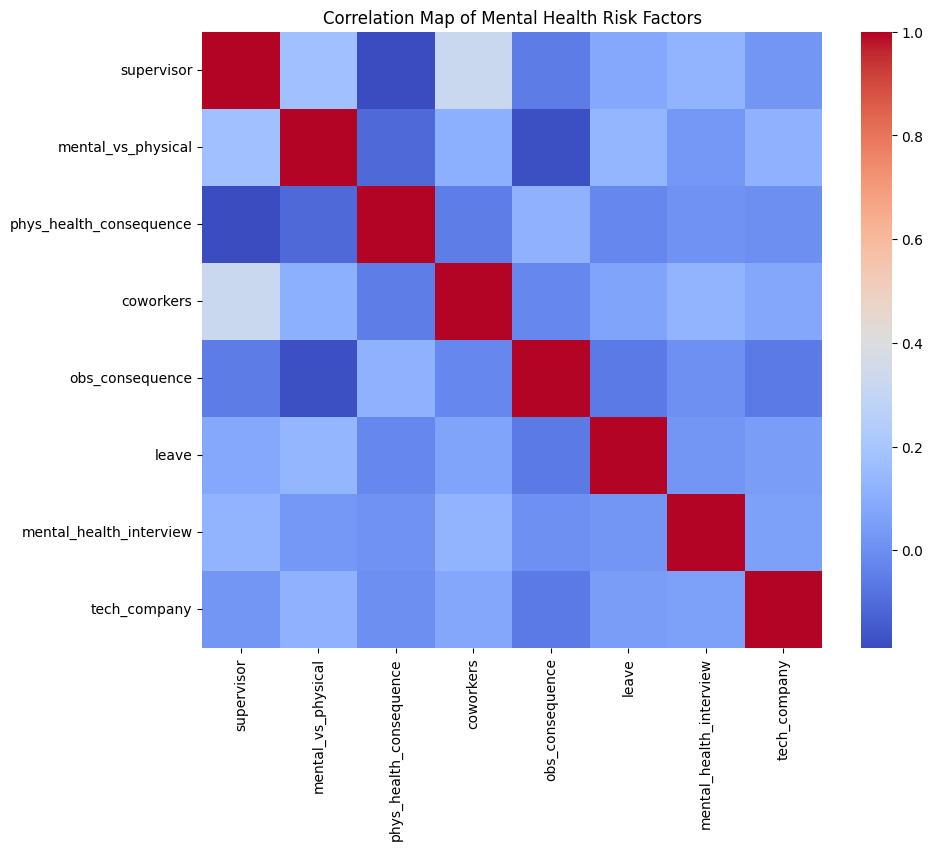

In [53]:
import seaborn as sns
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Map of Mental Health Risk Factors")
plt.show()


In [27]:
import os

# Create a single folder for all Plotly figures
os.makedirs("figures", exist_ok=True)

def save_plotly_figure(fig, filename):
    """Save a Plotly figure as both HTML (interactive) and PNG (static image)."""
    # Save as interactive HTML
    fig.write_html(f"figures/{filename}.html")
    # Save as static PNG (needs kaleido)
    fig.write_image(f"figures/{filename}.png", scale=2)
    print(f"✅ Saved: figures/{filename}.html and figures/{filename}.png")


In [38]:

df_copy.columns


Index(['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_bin_encoded',
       'country_encoded', 'ewi', 'country_iso', 'EWI'],
      dtype='object')

In [40]:
# =========================================================
# 🌿 POLICY IMPACT SIMULATION: Reducing Work Interference by 20%
# =========================================================

import pandas as pd
import numpy as np
import plotly.express as px
import os

# =========================================================
# 📁 Create folder for saving figures
# =========================================================
os.makedirs("figures", exist_ok=True)

def save_plotly_figure(fig, filename):
    """Save Plotly figure as HTML and PNG."""
    html_path = f"figures/{filename}.html"
    png_path = f"figures/{filename}.png"
    try:
        fig.write_html(html_path)
        fig.write_image(png_path, scale=2)
        print(f"✅ Saved: {html_path} and {png_path}")
    except Exception as e:
        print(f"⚠️ Saved only HTML (PNG export failed): {e}")

# =========================================================
# 🧠 STEP 1: Detect best model
# =========================================================
# If you already trained models earlier, assign the best one here.
# Example: best_model = best_rf or best_xgb depending on your previous results.

try:
    best_model  # Check if already defined
except NameError:
    # If not defined, try to assign one automatically
    if 'best_rf' in globals():
        best_model = best_rf
        print("✅ Using Random Forest as best_model.")
    elif 'best_xgb' in globals():
        best_model = best_xgb
        print("✅ Using XGBoost as best_model.")
    else:
        raise ValueError("❌ No trained model found! Please train best_rf or best_xgb before running this simulation.")

# =========================================================
# 🧩 STEP 2: Copy training features and predict base EWI
# =========================================================
X_sim = X_train.copy()
orig_preds = best_model.predict_proba(X_train)[:, 1] * 100  # baseline EWI %

# =========================================================
# 🔍 STEP 3: Find all columns related to 'work_interfere'
# =========================================================
work_cols = [c for c in X_sim.columns if 'work_interfere' in c.lower()]
if not work_cols:
    raise ValueError("❌ No column found related to 'work_interfere' in X_train.")
print("✅ Found work_interfere columns:", work_cols)

# =========================================================
# 🧮 STEP 4: Apply 20% improvement (simulate policy)
# =========================================================
for c in work_cols:
    X_sim[c] = X_sim[c] * 0.8  # reduce interference by 20%

# =========================================================
# 📊 STEP 5: Predict new EWI after policy implementation
# =========================================================
new_preds = best_model.predict_proba(X_sim)[:, 1] * 100

# =========================================================
# 📈 STEP 6: Compare results before vs after
# =========================================================
avg_before = orig_preds.mean()
avg_after = new_preds.mean()
improvement = avg_before - avg_after

print(f"🌍 Average EWI before policy: {avg_before:.2f}")
print(f"🌿 Average EWI after policy: {avg_after:.2f}")
print(f"🟢 Improvement: {improvement:.2f} points lower risk on average")

# =========================================================
# 🎨 STEP 7: Visualize the improvement
# =========================================================
comparison_df = pd.DataFrame({
    "Scenario": ["Before Policy", "After 20% Improvement"],
    "Average_EWI": [avg_before, avg_after]
})

fig = px.bar(
    comparison_df,
    x="Scenario",
    y="Average_EWI",
    color="Scenario",
    title="🌿 Policy Impact: Reducing Work Interference by 20%",
    color_discrete_sequence=["red", "green"],
    text="Average_EWI"
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=18),
    yaxis_title="Average Early Warning Index (EWI)",
    xaxis_title=None,
    template="plotly_white"
)

fig.show()
save_plotly_figure(fig, "policy_impact_simulation")

print("\n✅ Policy Impact Simulation Completed Successfully!")


✅ Using Random Forest as best_model.
✅ Found work_interfere columns: ['work_interfere']
🌍 Average EWI before policy: 38.03
🌿 Average EWI after policy: 38.03
🟢 Improvement: 0.00 points lower risk on average


⚠️ Saved only HTML (PNG export failed): 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido


✅ Policy Impact Simulation Completed Successfully!
